In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "../data/city_data.csv"
ride_data_to_load = "../data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(ride_data, city_data, on='city',how='left')

# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

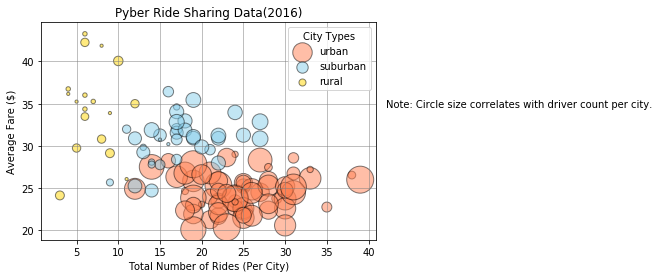

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_city = merge_df.loc[(merge_df['type'] == 'Urban')]
suburban_city = merge_df.loc[(merge_df['type'] == 'Suburban')]
rural_city = merge_df.loc[(merge_df['type'] == 'Rural')]

# find avarege fair for each city type
urban_avg_fare = urban_city.groupby('city')['fare'].mean()
suburban_avg_fare = suburban_city.groupby('city')['fare'].mean()
rural_avg_fare = rural_city.groupby('city')['fare'].mean()

# total number of rides per city
urban_total_rides = urban_city.groupby('city')['ride_id'].count()
suburban_total_rides = suburban_city.groupby('city')['ride_id'].count()
rural_total_rides = rural_city.groupby('city')['ride_id'].count()

# total number of drivers per city 
urban_total_drivers_city = urban_city.groupby('city')['driver_count'].value_counts()
suburban_total_drivers_city = suburban_city.groupby('city')['driver_count'].value_counts()
rural_total_drivers_city = rural_city.groupby('city')['driver_count'].value_counts()


# Build the scatter plots for each city types
plt.scatter(urban_total_rides, urban_avg_fare, marker ='o', facecolors='coral', edgecolor='black',alpha=0.5,s = urban_city['driver_count']*10,label='urban',linewidth=1)
plt.scatter(suburban_total_rides, suburban_avg_fare, marker ='o', facecolors='skyblue',edgecolor='black',alpha=0.5,s = suburban_city['driver_count']*10,label='suburban',linewidth=1)
plt.scatter(rural_total_rides, rural_avg_fare, marker ='o', facecolors='gold',edgecolor='black',alpha=0.5,s = rural_city['driver_count']*10,label='rural',linewidth=1)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Create a legend
plt.legend(loc='best',title='City Types')

# Incorporate a text label regarding circle size
plt.text(58,35,'Note: Circle size correlates with driver count per city.',horizontalalignment='center',verticalalignment='center')

# Save Figure
plt.savefig('Pyber Ride Sharing Data (2016)')

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

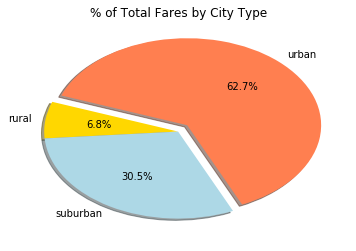

In [4]:
# Calculate Type Percents
total_fare = merge_df.groupby('type')['fare'].sum()

# Build Pie Chart
city_type =['rural','suburban','urban']
colors=['gold','lightblue','coral']
explode = 0,0,0.1
plt.title('% of Total Fares by City Type')
plt.pie(total_fare, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%",shadow=True,startangle=160)

# Save Figure
plt.savefig('% of Total Fares by City Type')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

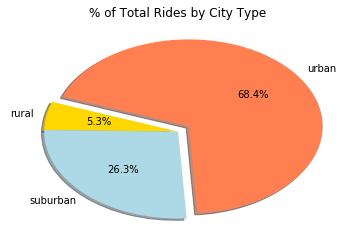

In [6]:
# Calculate Ride Percents
total_rides= merge_df.groupby('type')['ride_id'].count()

# Build Pie Chart
city_type =['rural','suburban','urban']
colors=['gold','lightblue','coral']
explode = 0,0,0.1
plt.title('% of Total Rides by City Type')
plt.pie(total_rides, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)

# Save Figure
plt.savefig('% of Total Rides by City Type')

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

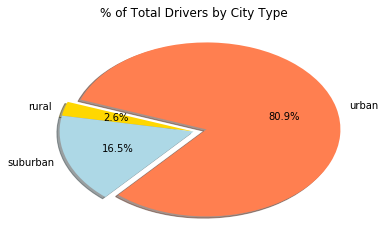

In [8]:
# Calculate Driver Percents
total_drivers = city_data.groupby('type')['driver_count'].sum()

# Build Pie Chart
city_type =['rural','suburban','urban']
colors=['gold','lightblue','coral']
explode = 0,0,0.1
plt.title('% of Total Drivers by City Type')
plt.pie(total_drivers, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)

# Save Figure
plt.savefig('% of Total Drivers by City Type')

In [9]:
# Show Figure
plt.show()